In [31]:
import pandas as pd

job_path = r'/Users/gamgoon/Development/ML/realty/지역고용통계_20190706075534.xlsx'
house_n_path = r'/Users/gamgoon/Development/ML/realty/행정구역_시군구_별_주민등록세대수_20190706074416.xlsx'

In [42]:
job_raw = pd.read_excel(job_path, skiprows=1)
house_n_raw = pd.read_excel(house_n_path)

In [26]:
job_data = job_raw[job_raw['산업별'] == '전산업']
job_data = job_data[['지역별','전체종사자']]
job_data.columns = ['지역명', '고용자수']

In [28]:
def get_sido(x):
    temp = x.split(' ')[0]
    if len(temp) != 4:
        return temp[:2]
    else:
        return temp[0] + temp[2]
    
job_data['시도'] = job_data['지역명'].apply(get_sido)
job_data['구군'] = job_data['지역명'].apply(lambda x: x.split(' ')[1])

In [49]:
def job_preprocessing(path):
    job_raw = pd.read_excel(job_path, skiprows=1)
    job_data = job_raw[job_raw['산업별'] == '전산업']
    job_data = job_data[['지역별','전체종사자']]
    job_data.columns = ['지역명', '고용자수']
    
    def get_sido(x):
        temp = x.split(' ')[0]
        if len(temp) != 4:
            return temp[:2]
        else:
            return temp[0] + temp[2]
        
    job_data['시도'] = job_data['지역명'].apply(get_sido)
    job_data['구군'] = job_data['지역명'].apply(lambda x: x.split(' ')[1])
    
    return job_data

In [43]:
house_n_raw

,행정구역(시군구)별(1),행정구역(시군구)별(2),2018. 01
0,전국,소계,21662900
1,서울특별시,소계,4224387
2,NaN,종로구,73562
3,NaN,중구,60520
4,NaN,용산구,107979
5,NaN,성동구,133233
6,NaN,광진구,161143
7,NaN,동대문구,159955
8,NaN,중랑구,179184
9,NaN,성북구,186939


In [44]:
# 세대수 데이터
house_n_raw.columns = ['시도', '구군', '세대수']

big_col = []
for num, temp in enumerate(house_n_raw['시도']):
    if pd.isna(temp):
        big_col.append(big_col[num - 1])
    else:
        big_col.append(temp)
        
house_n_raw['시도'] = big_col

In [45]:
house_n_raw

,시도,구군,세대수
0,전국,소계,21662900
1,서울특별시,소계,4224387
2,서울특별시,종로구,73562
3,서울특별시,중구,60520
4,서울특별시,용산구,107979
5,서울특별시,성동구,133233
6,서울특별시,광진구,161143
7,서울특별시,동대문구,159955
8,서울특별시,중랑구,179184
9,서울특별시,성북구,186939


In [46]:
def get_sido(x):
    if len(x) != 4:
        return x[:2]
    else:
        return x[0] + x[2]

house_n_raw['시도'] = house_n_raw['시도'].apply(get_sido)
house_n_data = house_n_raw[house_n_raw['구군'] != '소계']

In [47]:
house_n_data

,시도,구군,세대수
2,서울,종로구,73562
3,서울,중구,60520
4,서울,용산구,107979
5,서울,성동구,133233
6,서울,광진구,161143
7,서울,동대문구,159955
8,서울,중랑구,179184
9,서울,성북구,186939
10,서울,강북구,142708
11,서울,도봉구,137459


In [48]:
def house_number_preprocessing(path):
    house_n_raw = pd.read_excel(house_n_path)
    house_n_raw.columns = ['시도', '구군', '세대수']

    big_col = []
    for num, temp in enumerate(house_n_raw['시도']):
        if pd.isna(temp):
            big_col.append(big_col[num - 1])
        else:
            big_col.append(temp)

    house_n_raw['시도'] = big_col
    
    def get_sido(x):
        if len(x) != 4:
            return x[:2]
        else:
            return x[0] + x[2]

    house_n_raw['시도'] = house_n_raw['시도'].apply(get_sido)
    house_n_data = house_n_raw[house_n_raw['구군'] != '소계']
    
    return house_n_data

In [50]:
# 시도 단위로 고용자 수 살펴보기
job_df = job_preprocessing(job_path)

job_sido = job_df.groupby('시도').sum()
job_sido = job_sido.sort_values(by='고용자수', ascending=False)

In [53]:
# 시도 별 고용자 수 막대 그래프
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style

style.use('ggplot')
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

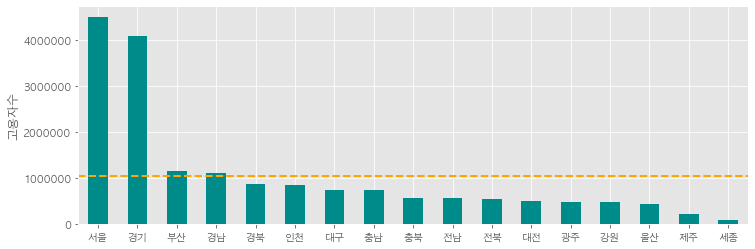

In [54]:
plt.figure(figsize=(12, 4))
job_sido['고용자수'].plot(kind='bar', color='darkcyan') #
plt.axhline(y=job_sido['고용자수'].mean(), color='orange', linewidth=2, ls='--') #
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('고용자수')
plt.show()

In [56]:
# 시도별 세대수 대비 고용자수 계산
house_n_df = house_number_preprocessing(house_n_path)

job_sido['세대수'] = house_n_df.groupby('시도').sum().loc[job_sido.index]
job_sido['세대수대비고용'] = job_sido['고용자수'] / job_sido['세대수'] * 100

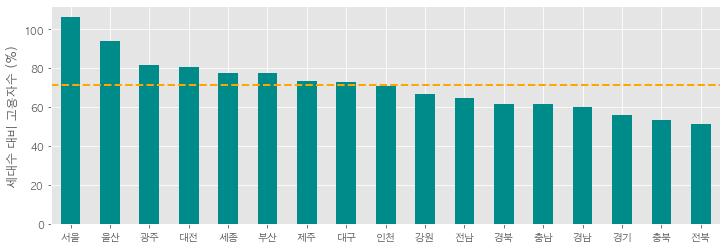

In [60]:
# 시도 단위 세대수 대비 고용비율을 막대그래프로
plt.figure(figsize=(12, 4))
job_sido.sort_values(by='세대수대비고용', ascending=False)['세대수대비고용'].plot(kind='bar', color='darkcyan')
plt.axhline(y=job_sido['세대수대비고용'].mean(), color='orange', linewidth=2, ls='--') #
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('세대수 대비 고용자수 (%)')
plt.show()

In [61]:
# 시도별 고용자 수, 세대수를 평균 아파트 매매가격과 함께

# 평균 아파트 매매가 데어터 함수
def gamjungwon_price_preprocessing(path):
    row_price = pd.read_excel(price_path, skiprows=10)
    big_col = []
    for num, temp in enumerate(row_price['지 역']):
        if pd.isna(temp):
            big_col.append(big_col[num - 1])
        else:
            big_col.append(temp)

    small_col = []
    for num in range(len(row_price)):
        temp_list = list(row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
        for temp in temp_list[3::-1]:
            if not pd.isna(temp):
                small_col.append(temp)
                break

    row_price.index = [big_col, small_col]
    
    transposed_price = row_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T
    time_index = []
    for time in transposed_price.index:
        temp = time.split(' ')
        time_index.append(temp[0][:-1] + '.' + temp[1][:-1])

    transposed_price.index = pd.to_datetime(time_index)
    
    return transposed_price

price_path = r'/Users/gamgoon/Development/ML/realty/평균매매가격_아파트.xlsx'
price_df = gamjungwon_price_preprocessing(price_path)

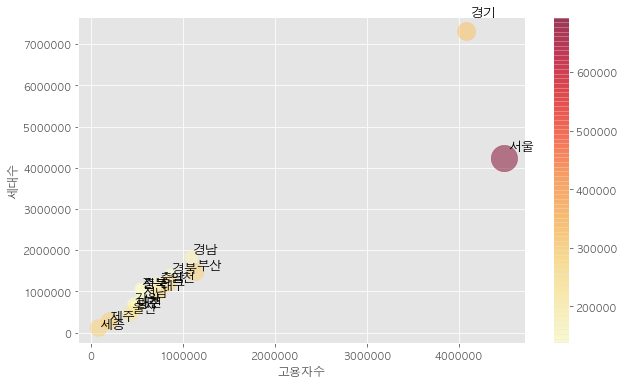

In [63]:
sido_list = []
for i in job_sido.index:
    sido_list.append(price_df.loc['2018-6-1'][i][i])
job_sido['평균매매가격'] = sido_list

plt.figure(figsize=(10, 6))
plt.scatter(job_sido['고용자수'], job_sido['세대수'], c=job_sido['평균매매가격'], s=job_sido['평균매매가격'] * 0.001, cmap="YlOrRd", alpha=0.5)
plt.xlabel('고용자수')
plt.ylabel('세대수')
for name in job_sido.index:
    plt.text(job_sido['고용자수'][name] * 1.01, job_sido['세대수'][name] * 1.05, name, fontsize=13)
plt.colorbar()
plt.show()

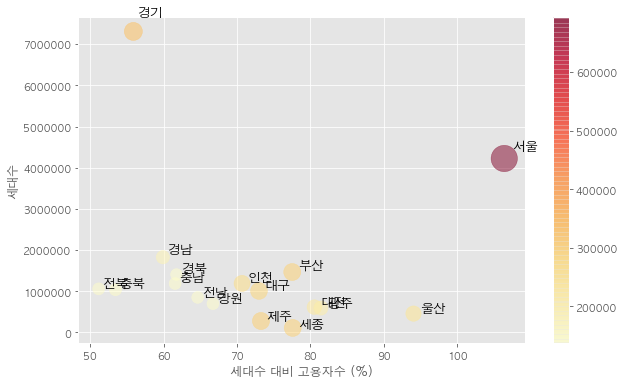

In [64]:
# 세대수 대비 고용비율, 세대수, 평균 아파트 매매가격
plt.figure(figsize=(10, 6))
plt.scatter(job_sido['세대수대비고용'], job_sido['세대수'], c=job_sido['평균매매가격'], s=job_sido['평균매매가격'] * 0.001, cmap="YlOrRd", alpha=0.5)
plt.xlabel('세대수 대비 고용자수 (%)')
plt.ylabel('세대수')
for name in job_sido.index:
    plt.text(job_sido['세대수대비고용'][name] * 1.01, job_sido['세대수'][name] * 1.05, name, fontsize=13)
plt.colorbar()
plt.show()

In [65]:
# 특정 시도 안에서 고용 데이터 살펴보기

# 서울 고용자수, 세대수, 평균 매매가격 데이터프레임
local = '서울'

job_gugun = job_df[job_df['시도'] == local].groupby('구군').sum()
job_gugun['세대수'] = house_n_df[house_n_df['시도'] == local].groupby('구군').sum().loc[job_gugun.index]
job_gugun['세대수대비고용'] = job_gugun['고용자수'] / job_gugun['세대수'] * 100
job_gugun['평균매매가격'] = price_df.loc['2018-6-1'][local][job_gugun.index]
job_gugun = job_gugun.dropna()

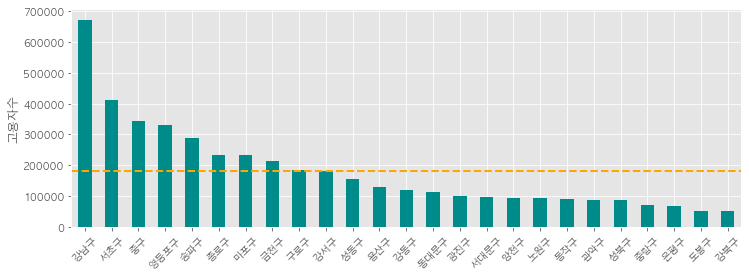

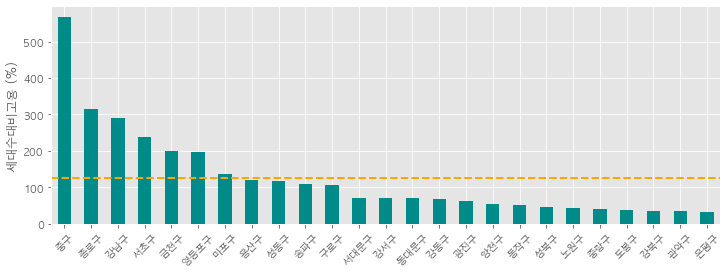

In [70]:
plt.figure(figsize=(12, 4))
job_gugun.sort_values(by='고용자수', ascending=False)['고용자수'].plot(kind='bar', color='darkcyan')
plt.axhline(y=job_gugun['고용자수'].mean(), color='orange', linewidth=2, ls='--') #
plt.xticks(rotation=45) 
plt.xlabel('')
plt.ylabel('고용자수')
plt.show()

plt.figure(figsize=(12, 4))
job_gugun.sort_values(by='세대수대비고용', ascending=False)['세대수대비고용'].plot(kind='bar', color='darkcyan')
plt.axhline(y=job_gugun['세대수대비고용'].mean(), color='orange', linewidth=2, ls='--') #
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('세대수대비고용 (%)')
plt.show()

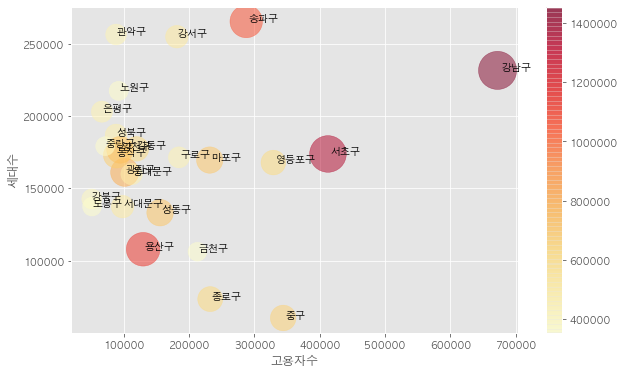

In [73]:
# 특정 시도 안에서 고용자수, 세대수, 평균 아파트 매매가
plt.figure(figsize=(10, 6))
plt.scatter(job_gugun['고용자수'], job_gugun['세대수'], c=job_gugun['평균매매가격'], s=pd.to_numeric(job_gugun['평균매매가격']) * 0.001, cmap="YlOrRd", alpha=0.5)
plt.xlabel('고용자수')
plt.ylabel('세대수')
for name in job_gugun.index:
    plt.text(job_gugun['고용자수'][name] * 1.01, job_gugun['세대수'][name], name)
plt.colorbar()
plt.show()

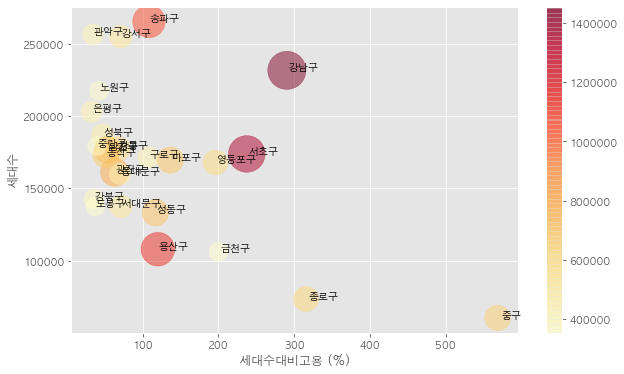

In [74]:
# 특정 시도 안에서 고용비율, 세대수, 평균 아파트 매매가
plt.figure(figsize=(10, 6))
plt.scatter(job_gugun['세대수대비고용'], job_gugun['세대수'], c=job_gugun['평균매매가격'], s=pd.to_numeric(job_gugun['평균매매가격']) * 0.001, cmap="YlOrRd", alpha=0.5)
plt.xlabel('세대수대비고용 (%)')
plt.ylabel('세대수')
for name in job_gugun.index:
    plt.text(job_gugun['세대수대비고용'][name] * 1.01, job_gugun['세대수'][name], name)
plt.colorbar()
plt.show()